# frequency domain inversion on csic data

## 1. 1 preparation for source inversion
#### import libraries
#### load data from estimated Green's functions, represented by the received signals from (relatively) wide-band received signals generating from a Gaussian stf
#### load observed data from experimental signals

In [4]:
#%%capture
execfile('plot_csic_main')

('the shape of the observed data: ', (3360, 176))
('the shape of the synthetic data: ', (42000, 176))


### 1.2 all constants are created here 

In [10]:
execfile('pconstant_setup.py')

UpSampleFactor : 0.0800000000000000017 
original sampling interval - syn: 0.0000000040000000000 s
original sampling interval - obs: 0.0000000500000000000 s
sampling interval before resampling - dtNewsyn: 0.0000000040000000000 s
sampling interval before resampling - dtNewobs: 0.0000000040000000000 s
sampling rate before resampling - syn: 250000000.000000 Hz
sampling rate before resampling - obs: 20000000.000000 Hz
sampling rate fsNewsyn after resampling - syn: 250000000.000000 Hz
sampling rate fsNewobs after resampling - obs: 250000000.000000 Hz
('time steps after resamping Ntnewobs = ', 42000)
zero-padded length of fft nfftsyn - syn: 65536 
zero-padded length of fft nfftobs - obs: 4096 
zero-padded length of fft nfftNewobs - obs: 65536 
zero-padded length of fft nfftNewsyn - syn: 65536 
frequency intervel after zero-padding - syn: 3814.697266 Hz
frequency intervel after zero-padding - obs: 61035.156250 Hz
frequency intervel after zero-padding - Newobs: 3814.697266 Hz (actually used)
fr

###  1.3 individual trace preprocessing

#### 1.3.1 loading, interpolation, and fft

In [3]:
trace_seleted = 90
trace_num = trace_seleted
# output: traceNew_obs,traceNew_syn，yf_Newobs，yf_Newsyn
execfile('ptraceprepare.py')

#### 1.3.2 just to plot the fft spectrum


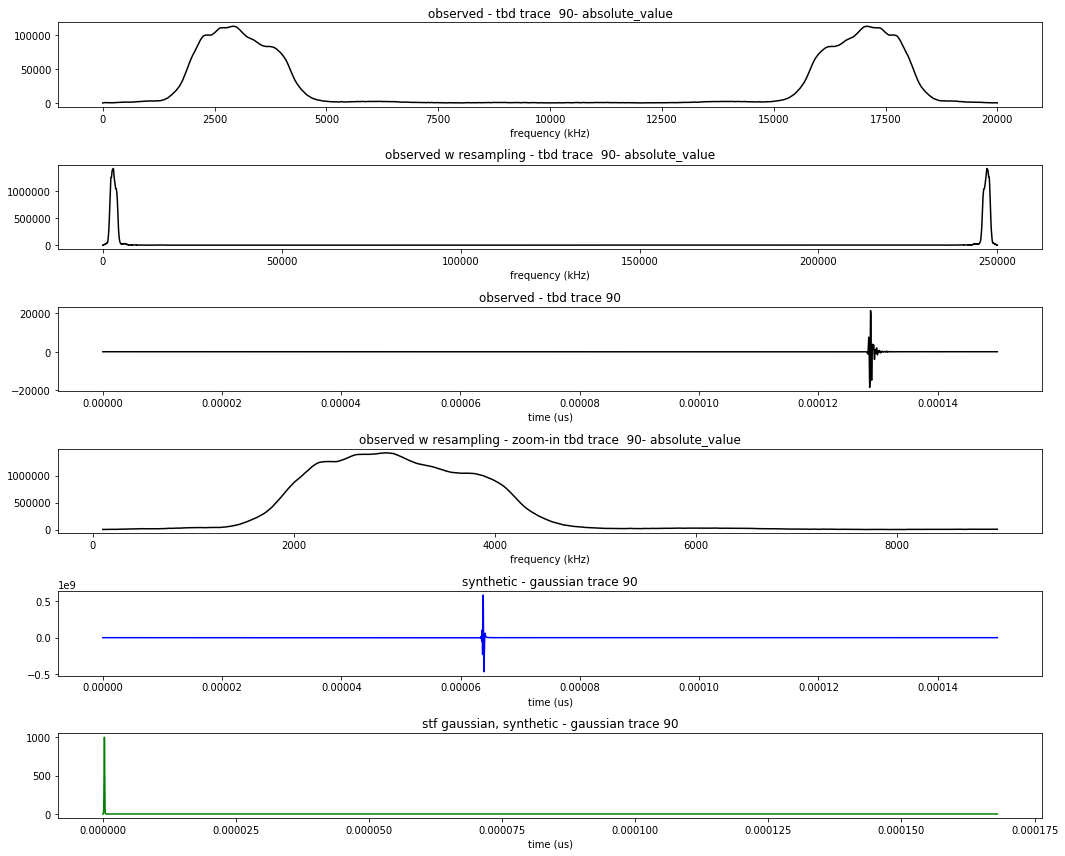

In [4]:
execfile('pplot_one_spectrum.py')

In [5]:
stf_syn.shape

(42000,)

#### 1.3.3 filer in the frequency domain 

('tukey_length', 2097)
('nfft', 65536)
('nfftNewobs', 65536)
('freq_pos.shape - tukey', (2097,))
('freq_pos.shape - pad', (2099,))
('freq_pos.shape - resize', (32768,))
('freq_neg.shape - freq_pos[::-1]', (32768,))
('syn_taper.shape - append', (65536,))


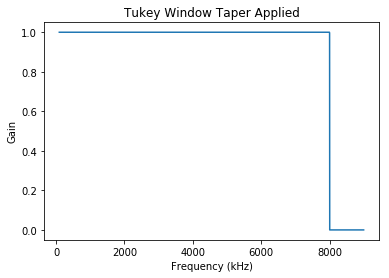

In [6]:
# filer in the frequency domain 
execfile('ptukey.py')

### 1.5 the actual source inversion program !!!!

In [7]:
# by controlling the range of the traces, chose stacked or not stacked  
inv_trace_num_star = 78
inv_trace_num_end = 90 + 1 
execfile('pstf_inverse.py')

### 1.6 filtering the inverted stf signal using a bandpass filter

In [8]:
execfile('pfilter_istf.py')

### 1.7 ploting the inverted stf/sff, with attempts for further improvements u    sing detrend or filtering

UpSampleFactor : 0.0800000000000000017 
original sampling interval - syn: 0.0000000040000000000 s
original sampling interval - obs: 0.0000000500000000000 s
sampling interval before resampling - dtNewsyn: 0.0000000040000000000 s
sampling interval before resampling - dtNewobs: 0.0000000040000000000 s
sampling rate before resampling - syn: 250000000.000000 Hz
sampling rate before resampling - obs: 20000000.000000 Hz
sampling rate fsNewsyn after resampling - syn: 250000000.000000 Hz
sampling rate fsNewobs after resampling - obs: 250000000.000000 Hz
('time steps after resamping Ntnewobs = ', 42000)
zero-padded length of fft nfftsyn - syn: 65536 
zero-padded length of fft nfftobs - obs: 4096 
zero-padded length of fft nfftNewobs - obs: 65536 
zero-padded length of fft nfftNewsyn - syn: 65536 
frequency intervel after zero-padding - syn: 3814.697266 Hz
frequency intervel after zero-padding - obs: 61035.156250 Hz
frequency intervel after zero-padding - Newobs: 3814.697266 Hz (actually used)
fr

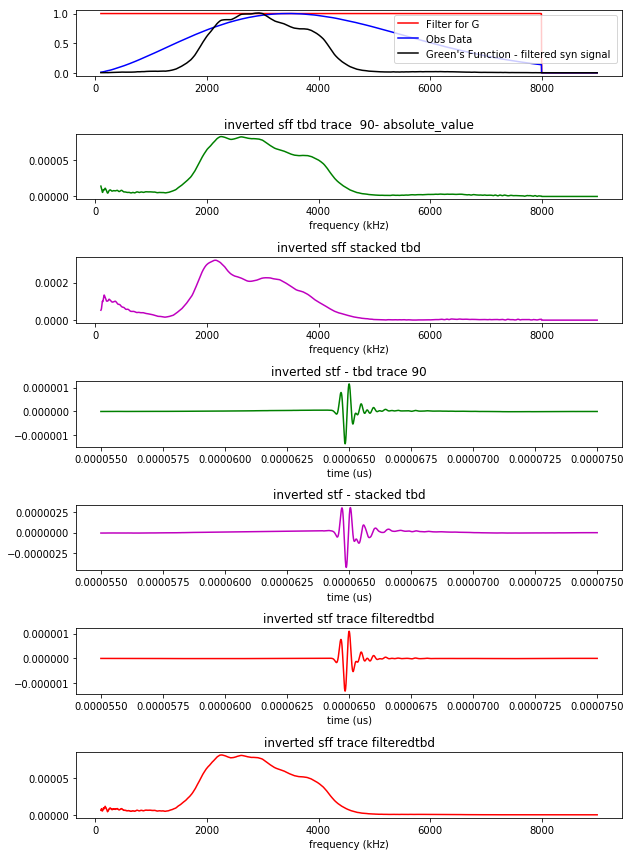

In [15]:
execfile('pconstant_setup.py')
execfile('pstf_inverse_plot.py')

### 1.8 save source inversion as txt - first inversion

In [ ]:
#### output the txt file: t_totalNew_obs and stf_inverted_trace_filtered
#execfile('pistf_save.py')

### 1.9 this is to dump the interpolated observed data for later usage 

In [ ]:
##### run once would be enough
# execfile('pdata_Re_obs_gene.py')

## 2.0 check the recovered stf's influence, compare the received signals from     
#### specfem2d using inverted stf with the measured signals review the individual trace generated from the inverted source time function 

### 2.1 this is to load back the new observed data

In [16]:
###data recovered as numpy as, one is interpolated observed data; the oth    er is received data generated from the inverted source time function

execfile('pdata_Re_obs_load.py')

### 2.2 setup the individual traces to evaluate the inverted source

In [17]:
#%%capture
%matplotlib inline
execfile('pconstant_setup.py')

## length for comparison of number of time steps
Ntcomp=Ntsyn; exp_para.Ntcomp = Ntcomp; 
# dtNew = 6e-9;
t_src_comp = np.arange(dtNew,Ntcomp*dtNew+dtNew,dtNew)

## data recovered as numpy as, one is interpolated observed data; the oth
## er is received data generated from the inverted source time function

## the trace number to compare
trace_num = trace_seleted

trace_interp_obs = data_Re_obs[:Ntcomp,trace_num]
print('shape of observed is :', trace_interp_obs.shape)
trace_Re_syn = data_Re_syn[:Ntcomp,trace_num]
print('shape of inverted source signal is :', trace_Re_syn.shape)

#yf_Newobs_ = fft(trace_obs, axis=0, n=nfftNewobs)
# fft of the newly recovered signals
yf_trace_interp_obs = fft(trace_interp_obs, axis=0, n=nfftNewobs)
yf_trace_inverted_syn = fft(trace_Re_syn, axis=0, n=nfftNewsyn)


UpSampleFactor : 0.0800000000000000017 
original sampling interval - syn: 0.0000000040000000000 s
original sampling interval - obs: 0.0000000500000000000 s
sampling interval before resampling - dtNewsyn: 0.0000000040000000000 s
sampling interval before resampling - dtNewobs: 0.0000000040000000000 s
sampling rate before resampling - syn: 250000000.000000 Hz
sampling rate before resampling - obs: 20000000.000000 Hz
sampling rate fsNewsyn after resampling - syn: 250000000.000000 Hz
sampling rate fsNewobs after resampling - obs: 250000000.000000 Hz
('time steps after resamping Ntnewobs = ', 42000)
zero-padded length of fft nfftsyn - syn: 65536 
zero-padded length of fft nfftobs - obs: 4096 
zero-padded length of fft nfftNewobs - obs: 65536 
zero-padded length of fft nfftNewsyn - syn: 65536 
frequency intervel after zero-padding - syn: 3814.697266 Hz
frequency intervel after zero-padding - obs: 61035.156250 Hz
frequency intervel after zero-padding - Newobs: 3814.697266 Hz (actually used)
fr

### 2.3 plot the individual traces to evaluate the inverted source

('amp_ratio_obs_syn = ', 20604.224708622623)


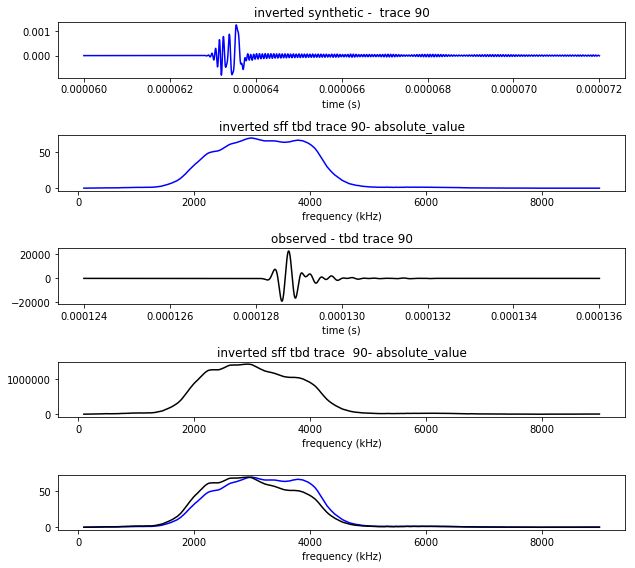

In [18]:
steps_length = 3000
t_star_showsyn = 15000
t_end_showsyn = steps_length + t_star_showsyn
t_star_showobs = 31000
t_end_showobs = steps_length + t_star_showobs
execfile('pplot_Re_one_spectrum.py')


In [ ]:
%%capture
# supress the printing function 
#trace_num = 120 
#for trace_num in range(0,170,30):

yf_stf_inverted_stack = np.zeros(1, dtype=np.complex)
for trace_num in range(0,176,1):
    #execfile('plot_csic.py')
    execfile('ptraceprepare.py')
    # Now we change into the frequency domain

    yf_NewNormobs = yf_Newobs/(max(yf_Newobs))
    yf_NewNormsyn = yf_Newsyn/(max(yf_Newsyn))

    #yf_obs_maxnormed = yf_obs/max(yf_obs)

    # normalized received signals in the frequency domain, for plotting purposes
    yf_Newsyn_filteredsyn = yf_Newsyn*syn_taper
    yf_Newsyn_filteredNormsyn = yf_Newsyn_filteredsyn/max(yf_Newsyn_filteredsyn)

    yf_Newsyn_filteredobs = yf_Newobs*syn_taper
    yf_Newsyn_filteredNormobs = yf_Newsyn_filteredobs/max(yf_Newsyn_filteredobs)

    
    # Now we invert for the source in the frequency domain (obs as gaussian for Greens'function )
    yf_stf_inverted = np.array([0.0+0.0j])
    for i in range(1, nfftNewsyn):
        if np.abs(yf_Newsyn_filteredsyn[i]) != 0:
            #yf_stf_inverted = np.append(yf_stf_inverted, (yf_Newsyn_filteredNormsyn[i].T*yf_Newobs[i].conj().T)/(yf_Newsyn_filteredNormsyn[i].T*yf_Newsyn_filteredNormsyn[i].conj().T))
            yf_stf_inverted = np.append(yf_stf_inverted, (yf_Newsyn_filteredsyn[i].T*yf_Newobs[i].conj().T)/(yf_Newsyn_filteredsyn[i].T*yf_Newsyn_filteredsyn[i].conj().T))
        else:
            yf_stf_inverted = np.append(yf_stf_inverted, 0.0+0.0j)
    yf_stf_inverted = yf_stf_inverted.conj().T
    #yf_stf_inverted = fft(stf_inverted[0:Nt], axis=0, n=nfft)
    yf_stf_inverted_stack = yf_stf_inverted_stack + yf_stf_inverted
    

In [ ]:
# stf_inverted=ifft(yf_stf_inverted,n=nfftNewsyn)
# stf_inverted_stack=ifft(yf_stf_inverted_stack,n=nfftNewsyn)

fig, (ax2,ax3,ax4,ax5) = plt.subplots(nrows=4)

ax2.plot(xf_Newobs[freq_step_starNewobs:freq_step_endNewobs]/1000,np.abs(yf_stf_inverted[freq_step_starNewobs:freq_step_endNewobs]),'-k')
ax2.set_title('inverted sff ' + str(obs_name) + ' trace  ' + str(trace_num) + '- absolute_value')
ax2.set_xlabel('frequency (kHz)')

ax3.plot(xf_Newobs[freq_step_starNewobs:freq_step_endNewobs]/1000,np.abs(yf_stf_inverted_stack[freq_step_starNewobs:freq_step_endNewobs]),'-k')
ax3.set_title('inverted sff stacked ' + str(obs_name) )
ax3.set_xlabel('frequency (kHz)')

ax4.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],stf_inverted[t_starNew_showobs:t_endNew_showobs],'k-')
ax4.set_title('inverted stf - ' + str(obs_name) + ' trace ' + str(trace_num))
ax4.set_xlabel('time (us)')

ax5.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],stf_inverted_stack[t_starNew_showobs:t_endNew_showobs],'k-')
ax5.set_title('inverted stf - stacked ' + str(obs_name))
ax5.set_xlabel('time (us)')

##ax5.plot(xf_Newobs[freq_step_starNewobs:freq_step_endNewobs]/1000,np.abs(yf_stf_inverted_stack[freq_step_starNewobs:freq_step_endNewobs]),'-k')
#ax5.set_title('inverted stf stacked ' + str(obs_name) + ' trace  ' + str(trace_num) + '- absolute_value')
#ax5.set_xlabel('frequency (kHz)')


plt.tight_layout(rect=[0, 0, 1.5, 2])

In [ ]:
import time


stf = open("obf/output/stf_tbd_csic","w")

for i in range(0,27000):#nstep + delay):
    stf.write("%20.19f " %t_totalNew_obs[i])
    stf.write("%20.19f\n" %stf_inverted_stack[i] )
    # to make sure the i/o is correct with the write function 
    #print(i)
    time.sleep(0.001)

In [ ]:
t_totalNew_obs.shape

In [ ]:
np.abs(yf_Newobs).shape

In [ ]:
import pickle
pickle.dump(exp_para,open('obf/input/exp_para.pickle','wb'))


In [ ]:
trace_inverted_obs = data_obs[:41000,trace_num]
print('shape of observed is :', trace_inverted_obs.shape)

In [ ]:
%%capture
execfile('plot_csic_main')

In [ ]:
trace_inverted_obs.shape

In [ ]:
%%capture
%matplotlib inline
execfile('pconstant_setup.py')

## length for comparison of number of time steps
Ntcomp=Ntsyn; exp_para.Ntcomp = Ntcomp; 
# dtNew = 6e-9;
t_src_comp = np.arange(dtNew,Ntcomp*dtNew+dtNew,dtNew)


## data recovered as numpy as, one is interpolated observed data; the oth
## er is received data generated from the inverted source time function
execfile('pdata_Re_obs_load.py')

## the trace number to compare
trace_num = 88

trace_interp_obs = data_Re_obs[:Ntcomp,trace_num]
print('shape of observed is :', trace_interp_obs.shape)
trace_Re_syn = data_Re_syn[:Ntcomp,trace_num]
print('shape of inverted source signal is :', trace_Re_syn.shape)

#yf_Newobs_ = fft(trace_obs, axis=0, n=nfftNewobs)
# fft of the newly recovered signals
yf_trace_inverted_syn = fft(trace_Re_syn, axis=0, n=nfftNewsyn)


In [ ]:
#print('the shape of the synthetic data using the inverted signals: ', data_Re_syn.shape)
#print('the shape of the observed data: ', data_Re_obs.shape)


In [ ]:
steps_length = 3000

t_star_showsyn = 15000
t_end_showsyn = steps_length + t_star_showsyn

t_star_showobs = 20500
t_end_showobs = steps_length + t_star_showobs

execfile('pplot_Re_one_spectrum.py')


### 1.1 plot the received signals

In [ ]:
1.1 # plot the received signals
time_star= 800 * dtobs
time_end = 2700 * dtobs


t_star_show = int(time_star/dtNew)
t_end_show = int(time_end/dtNew)

t_star_showsyn = int(time_star/dtsyn)
t_end_showsyn = int(time_end/dtsyn)

t_star_showobs = int(time_star/dtobs)
t_end_showobs = int(time_end/dtobs)

t_starNew_showobs = int(time_star/dtNewobs)
t_endNew_showobs = int(time_end/dtNewobs)


fig, (ax0,ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=7)

ax0.plot(sample_syn[t_star_showsyn:t_end_showsyn],trace_syn[t_star_showsyn:t_end_showsyn],'b-')
ax0.set_title('synthetic - ' + str(syn_name) + ' trace ' + str(trace_num))
ax0.set_xlabel('time steps')

ax1.plot(sample_obs[t_star_showobs:t_end_showobs],trace_obs[t_star_showobs:t_end_showobs],'k-')
ax1.set_title('observed - ' + str(obs_name) + ' trace ' + str(trace_num))
ax1.set_xlabel('time steps')

ax2.plot(t_total_syn[t_star_showsyn:t_end_showsyn],trace_syn[t_star_showsyn:t_end_showsyn],'b-')
ax2.set_title('synthetic - ' + str(syn_name) + ' trace ' + str(trace_num))
ax2.set_xlabel('time (s)')

ax3.plot(t_total_obs[t_star_showobs:t_end_showobs],trace_obs[t_star_showobs:t_end_showobs],'k-')
ax3.set_title('observed - ' + str(obs_name) + ' trace ' + str(trace_num))
ax3.set_xlabel('time (s)')

ax4.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],traceNew_obs[t_starNew_showobs:t_endNew_showobs],'k-')
ax4.set_title('observed resampled - ' + str(obs_name) + ' trace ' + str(trace_num))
ax4.set_xlabel('time (s)')

ax5.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],traceNew_detrendobs[t_starNew_showobs:t_endNew_showobs],'k-')
ax5.set_title('observed resampled detrend - ' + str(obs_name) + ' trace ' + str(trace_num))
ax5.set_xlabel('time (s)')

ax6.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],traceNew_detrend_filteredobs[t_starNew_showobs:t_endNew_showobs],'k-')
ax6.set_title('observed resampled detrend filtered - ' + str(obs_name) + ' trace ' + str(trace_num))
ax6.set_xlabel('time (s)')


plt.tight_layout(rect=[0, 0, 3, 4])
fig.show()

### 2.0  We now generate the frequency filter that has already been applied to the processed field data. We plot the filter to verify.

In [ ]:
import numpy as np
from scipy import signal
from obspy.signal.util import _npts2nfft
from scipy.fftpack import fft, ifft, fftfreq

# Setup prefilter with cosine taper
#npts = len(field_trace.data) # resampled trace so different from FieldDataProcessing
#print('npts',npts)
#nfft = _npts2nfft(npts)

tukey_end_freq = 8000000
tukey_length = int(round(tukey_end_freq/dfNew_padResyn))
print('tukey_length',tukey_length)

print('nfft',nfft)
print('nfftNewobs',nfftNewobs)

freq_pos = signal.tukey(tukey_length, alpha=0.02)
print('freq_pos.shape - tukey',freq_pos.shape)
freq_pos = np.pad(freq_pos, 1,'constant',constant_values=0)
print('freq_pos.shape - pad',freq_pos.shape)
freq_pos.resize(nfftNewobs/2)
print('freq_pos.shape - resize',freq_pos.shape)
freq_neg = freq_pos[::-1]
print('freq_neg.shape - freq_pos[::-1]',freq_neg.shape)
syn_taper = np.append(freq_pos, freq_neg)
print('syn_taper.shape - append',syn_taper.shape)
syn_taper
# Plot the filter
freqs = fftfreq(nfftNewsyn, d=dfNew_padResyn)
#freqs = fftfreq(nfft, d=0.000000003)

#plt.plot(freqs[0:120]/1e3,freq_pos[0:120])
plt.plot(xf_Newobs[freq_step_starNewsyn-1:freq_step_endNewsyn-1]/1e3,freq_pos[freq_step_starNewsyn-1:freq_step_endNewsyn-1])
plt.title('Tukey Window Taper Applied')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Gain')

In [ ]:
xf_Newobs.shape

In [ ]:
freq_pos[1-1:1600-1]

In [ ]:
dfNew_padResyn

In [ ]:
# Now we change into the frequency domain

yf_NewNormobs = yf_Newobs/(max(yf_Newobs))
yf_NewNormsyn = yf_Newsyn/(max(yf_Newsyn))

#yf_obs_maxnormed = yf_obs/max(yf_obs)

# normalized received signals in the frequency domain, for plotting purposes
yf_Newsyn_filteredsyn = yf_Newsyn*syn_taper
yf_Newsyn_filteredNormsyn = yf_Newsyn_filteredsyn/max(yf_Newsyn_filteredsyn)

yf_Newsyn_filteredobs = yf_Newobs*syn_taper
yf_Newsyn_filteredNormobs = yf_Newsyn_filteredobs/max(yf_Newsyn_filteredobs)


# Plot the spectrums
#plt.plot(freqs,syn_taper)
#plt.plot(freqs,np.abs(yf_syn_maxnormed),color="black")
#plt.plot(freqs,np.abs(yf_stf_obs_maxnormed),color="red")
plt.plot(xf_Newobs[freq_step_starNewsyn-1:freq_step_endNewsyn-1]/1e3,syn_taper[freq_step_starNewsyn-1:freq_step_endNewsyn-1])
plt.plot(xf_Newsyn[freq_step_starNewsyn-1:freq_step_endNewsyn-1]/1e3,np.abs(yf_Newsyn_filteredNormsyn[freq_step_starNewsyn-1:freq_step_endNewsyn-1]),color="black")
plt.plot(xf_Newobs[freq_step_starNewsyn-1:freq_step_endNewsyn-1]/1e3,np.abs(yf_Newsyn_filteredNormobs[freq_step_starNewsyn-1:freq_step_endNewsyn-1]),color="red")

#plt.plot(xf_Newsyn[freq_step_star-1:freq_step_end-1]/1e3,syn_taper[freq_step_star-1:freq_step_end-1])
#plt.plot(xf[freq_step_star-1:freq_step_end-1]/1e3,np.abs(yf_obs_maxnormed[freq_step_star-1:freq_step_end-1]),color="black")
#plt.plot(xf[freq_step_star-1:freq_step_end-1]/1e3,np.abs(yf_syn_filtered_maxnormed[freq_step_star-1:freq_step_end-1]),color="red")

plt.legend(['Filter for G', 'Obs Data', "Green's Function - filtered syn signal "])

In [ ]:
# Now we invert for the source in the frequency domain (obs as gaussian for Greens'function )
yf_stf_inverted = np.array([0.0+0.0j])
for i in range(1, nfftNewsyn):
    if np.abs(yf_Newsyn_filteredsyn[i]) != 0:
        #yf_stf_inverted = np.append(yf_stf_inverted, (yf_Newsyn_filteredNormsyn[i].T*yf_Newobs[i].conj().T)/(yf_Newsyn_filteredNormsyn[i].T*yf_Newsyn_filteredNormsyn[i].conj().T))
        yf_stf_inverted = np.append(yf_stf_inverted, (yf_Newsyn_filteredsyn[i].T*yf_Newobs[i].conj().T)/(yf_Newsyn_filteredsyn[i].T*yf_Newsyn_filteredsyn[i].conj().T))
    else:
        yf_stf_inverted = np.append(yf_stf_inverted, 0.0+0.0j)
yf_stf_inverted = yf_stf_inverted.conj().T
#yf_stf_inverted = fft(stf_inverted[0:Nt], axis=0, n=nfft)
stf_inverted=ifft(yf_stf_inverted,n=nfftNewsyn)


### 2.1 post processing the inverted stf

In [ ]:
# filtering 
freqmin=30000
freqmax=5000000

#traceNew_detrendobs = np.copy(signal.detrend(traceNew_obs))
#yf_traceNew_detrendobs = fft(traceNew_detrendobs, axis=0, n=nfftNewobs)
stf_inverted_detrend_filtered = bandpass(stf_inverted_detrend, freqmin, freqmax, fsNewobs, zerophase=True)
yf_stf_inverted_detrend_filtered = fft(stf_inverted_detrend_filtered, axis=0, n=nfftNewobs) 


# stf_inverted_shifted_filtered = bandpass(stf_inverted_shifted, freqmin, freqmax, fs_new, zerophase=True)
# yf_stf_inverted_shifted_filtered = fft(stf_inverted_shifted_filtered, axis=0, n=nfft)


In [ ]:
# sff - source frequency function 
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows=4)

ax0.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],stf_inverted[t_starNew_showobs:t_endNew_showobs],'m-')
ax0.set_title('Inverted stf - ' + str(obs_name) + ' trace ' + str(trace_num))
ax0.set_xlabel('time (s)')

ax1.plot(xf_Newobs[freq_step_starNewsyn-1:freq_step_endNewsyn-1]/1000,np.abs(yf_stf_inverted[freq_step_starNewsyn-1:freq_step_endNewsyn-1]),'-m')
ax1.set_title( 'Inverted sff ')
ax1.set_xlabel('frequency (kHz)')

ax2.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],stf_inverted_detrend_filtered[t_starNew_showobs:t_endNew_showobs],'r-')
ax2.set_title('Inverted detrend filtered stf - ' + str(obs_name) + ' trace ' + str(trace_num))
ax2.set_xlabel('time (s)')

ax3.plot(xf_Newobs[freq_step_starNewsyn-1:freq_step_endNewsyn-1]/1000,np.abs(yf_stf_inverted_detrend_filtered[freq_step_starNewsyn-1:freq_step_endNewsyn-1]),'-r')
ax3.set_title( 'Inverted detrend filtered sff')
ax3.set_xlabel('frequency (kHz)')

#ax1.plot(xf[freq_step_star-1:freq_step_end-1]/1000,np.abs(yf_stf_obs[freq_step_star-1:freq_step_end-1]),'-k')
#ax1.set_title( 'observed - gaussian, stf, absolute_value - zoom in')
#ax1.set_xlabel('frequency (kHz)')

plt.tight_layout(rect=[0, 0, 2, 2])

fig.show()